In [ ]:
pip install scipy tqdm statsmodels seaborn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import pandas as pd # data preprocessing
import seaborn as sns # graph style
from scipy.stats import norm
import time
from tqdm.notebook import tqdm
from scipy.stats import rankdata
import pandas.tseries.offsets as offsets
import scipy.stats as stats
import statsmodels.api as sm

In [5]:
# seaborn settings　（optional: graph style)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [6]:
# import module from other directory if necessary
import sys
sys.path.append('/Users/../..')

In [8]:
# import dfa-based analysis
from mf_adcca import dcca, basic_dcca

# Datasets

### please prepare datasets as np.array

### ex.) first data = daily_return.values, second data = BPV_vola_pctchange.values

# results

## cross-correlation statistics (testing power-law cross-correlations)

In [31]:
def Qcc(m, x, y):
    N = len(x)
    assert len(y) == N, '{} segments'.format(len(y))
    
    bunbo = np.sqrt(np.sum(x**2)*np.sum(y**2))
    C_ = []
    for j in range(1, m+1):
        x = np.delete(x, 0)
        y = np.delete(y, len(y)-1)
        assert len(x) == N-j, '{} segments'.format(len(x))
        assert len(y) == N-j, '{} segments'.format(len(x))
        C_ = np.append(C_, np.sum(x*y))
    
    C_ = C_/bunbo
    to_sum = np.array([(C_[i-1]**2)/(N-i) for i in range(1, m+1)])
    ans = (N**2)*np.cumsum(to_sum)
    return ans

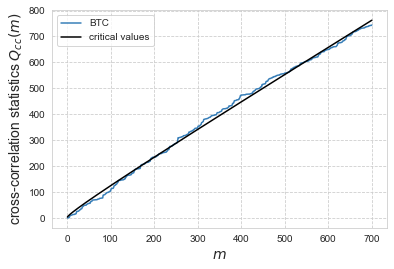

In [35]:
"""
    repeat for each data series
"""


nm = 700

fig = plt.figure(figsize=(6,4)) #change figure size
plt.xlabel('$m$', size=14)
plt.ylabel('cross-correlation statistics '+r'$Q_{cc}(m)$', size=14)
xjiku = list(range(1, nm+1))

# dataset
dat_ret_btc = np.copy(daily_return.values)
dat_BPV_btc = np.copy(BPV_vola_pctchange.values)

plt.plot(xjiku, Qcc(nm, dat_ret_btc, dat_BPV_btc), label='BTC', color='#377eb8') # plot
#plt.plot(xjiku, Qcc(nm, dat_RV_eth, dat_ret_eth), label='ETH', color='#e41a1c') #plot
#plt.plot(xjiku, Qcc(nm, dat_ret_xrp, dat_RV_xrp), label='XRP', color='#2ca02c') # plot
#plt.plot(xjiku, Qcc(nm, dat_ret_ltc, dat_RV_ltc), label='LTC', color='#ff7f0e') # plot

threshold = []
for m in range(1, nm+1):
    threshold = np.append(threshold, scipy.stats.chi2.interval(0.9, m)[1]) # 有意水準, 自由度

plt.plot(xjiku, threshold, label = 'critical values', color='black') #plot
#plt.xscale('log')
#plt.yscale('log')
legend = plt.legend(frameon=True)
#save as pdf
#plt.savefig('Qcc_160601_201228_price-volatility_RV.pdf', bbox_inches="tight")
plt.show()

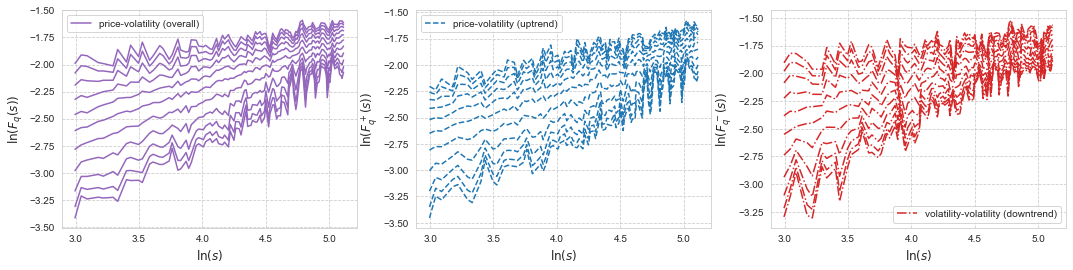

In [37]:
# depict long-range power-law correlations
##################################
# datasets
dat1 = np.copy(daily_return.values)
dat2 = np.copy(BPV_vola_pctchange.values)
##################################
# decide what base of trend to use
trend_base = np.exp(np.cumsum(daily_return.values)) # index-based

# show log-log plot
fig = plt.figure(figsize=(18,4)) #change figure size
plt.subplot(1,3,1)
plt.xlabel('$\ln(s)$', size=12)
plt.ylabel('$\ln(F_q(s))$', size=12)
#plot
plt.grid(which='both')
plt.grid(which='major')

# overall (numbers 0-2)
# q is set to -10 to 10
#"""
plot_df010 = np.reshape(basic_dcca(dat1, dat2, Q=[-10])[:2], [2,100])
plot_df08 = np.reshape(basic_dcca(dat1, dat2, Q=[-8])[:2], [2,100])
plot_df06 = np.reshape(basic_dcca(dat1, dat2, Q=[-6])[:2], [2,100])
plot_df04 = np.reshape(basic_dcca(dat1, dat2, Q=[-4])[:2], [2,100])
plot_df02 = np.reshape(basic_dcca(dat1, dat2, Q=[-2])[:2], [2,100])
plot_df0 = np.reshape(basic_dcca(dat1, dat2, Q=[0])[:2], [2,100])
plot_df2 = np.reshape(basic_dcca(dat1, dat2, Q=[2])[:2], [2,100])
plot_df4 = np.reshape(basic_dcca(dat1, dat2, Q=[4])[:2], [2,100])
plot_df6 = np.reshape(basic_dcca(dat1, dat2, Q=[6])[:2], [2,100])
plot_df8 = np.reshape(basic_dcca(dat1, dat2, Q=[8])[:2], [2,100])
plot_df10 = np.reshape(basic_dcca(dat1, dat2, Q=[10])[:2], [2,100])
# take log for plotting
plot_df010 = np.log(plot_df010)
plot_df08 = np.log(plot_df08)
plot_df06 = np.log(plot_df06)
plot_df04 = np.log(plot_df04)
plot_df02 = np.log(plot_df02)
plot_df0 = np.log(plot_df0)
plot_df2 = np.log(plot_df2)
plot_df4 = np.log(plot_df4)
plot_df6 = np.log(plot_df6)
plot_df8 = np.log(plot_df8)
plot_df10 = np.log(plot_df10)
#"""

plt.plot(plot_df010[0], plot_df010[1], marker=None, linestyle='solid', markersize=5, color='#9467bd')
plt.plot(plot_df08[0], plot_df08[1], marker=None, linestyle='solid', markersize=5, color='#9467bd')
plt.plot(plot_df06[0], plot_df06[1], marker=None, linestyle='solid', markersize=5, color='#9467bd')
plt.plot(plot_df04[0], plot_df04[1], marker=None, linestyle='solid', markersize=5, color='#9467bd')
plt.plot(plot_df02[0], plot_df02[1], marker=None, linestyle='solid', markersize=5, color='#9467bd')
plt.plot(plot_df0[0], plot_df0[1], marker=None, linestyle='solid', markersize=5, label='price-volatility (overall)', color='#9467bd')
plt.plot(plot_df2[0], plot_df2[1], marker=None, linestyle='solid', markersize=5, color='#9467bd')
plt.plot(plot_df4[0], plot_df4[1], marker=None, linestyle='solid', markersize=5, color='#9467bd')
plt.plot(plot_df6[0], plot_df6[1], marker=None, linestyle='solid', markersize=5, color='#9467bd')
plt.plot(plot_df8[0], plot_df8[1], marker=None, linestyle='solid', markersize=5, color='#9467bd')
plt.plot(plot_df10[0], plot_df10[1], marker=None, linestyle='solid', markersize=5, color='#9467bd')
# legend
legend = plt.legend(frameon=True)

plt.subplot(1,3,2)
plt.xlabel('$\ln(s)$', size=12)
plt.ylabel('$\ln(F^+_q(s))$', size=12)

# uptrend (numbers 3-5)
# q is set to -10 to 10
#"""
plot_df010 = np.reshape(basic_dcca(dat1, dat2, Q=[-10])[3:5], [2,100])
plot_df08 = np.reshape(basic_dcca(dat1, dat2, Q=[-8])[3:5], [2,100])
plot_df06 = np.reshape(basic_dcca(dat1, dat2, Q=[-6])[3:5], [2,100])
plot_df04 = np.reshape(basic_dcca(dat1, dat2, Q=[-4])[3:5], [2,100])
plot_df02 = np.reshape(basic_dcca(dat1, dat2, Q=[-2])[3:5], [2,100])
plot_df0 = np.reshape(basic_dcca(dat1, dat2, Q=[0])[3:5], [2,100])
plot_df2 = np.reshape(basic_dcca(dat1, dat2, Q=[2])[3:5], [2,100])
plot_df4 = np.reshape(basic_dcca(dat1, dat2, Q=[4])[3:5], [2,100])
plot_df6 = np.reshape(basic_dcca(dat1, dat2, Q=[6])[3:5], [2,100])
plot_df8 = np.reshape(basic_dcca(dat1, dat2, Q=[8])[3:5], [2,100])
plot_df10 = np.reshape(basic_dcca(dat1, dat2, Q=[10])[3:5], [2,100])
# take log for plotting
plot_df010 = np.log(plot_df010)
plot_df08 = np.log(plot_df08)
plot_df06 = np.log(plot_df06)
plot_df04 = np.log(plot_df04)
plot_df02 = np.log(plot_df02)
plot_df0 = np.log(plot_df0)
plot_df2 = np.log(plot_df2)
plot_df4 = np.log(plot_df4)
plot_df6 = np.log(plot_df6)
plot_df8 = np.log(plot_df8)
plot_df10 = np.log(plot_df10)
#"""

plt.plot(plot_df010[0], plot_df010[1], marker=None, linestyle='dashed', markersize=5, color='#1f77b4')
plt.plot(plot_df08[0], plot_df08[1], marker=None, linestyle='dashed', markersize=5, color='#1f77b4')
plt.plot(plot_df06[0], plot_df06[1], marker=None, linestyle='dashed', markersize=5, color='#1f77b4')
plt.plot(plot_df04[0], plot_df04[1], marker=None, linestyle='dashed', markersize=5, color='#1f77b4')
plt.plot(plot_df02[0], plot_df02[1], marker=None, linestyle='dashed', markersize=5, color='#1f77b4')
plt.plot(plot_df0[0], plot_df0[1], marker=None, linestyle='dashed', markersize=5, label='price-volatility (uptrend)', color='#1f77b4')
plt.plot(plot_df2[0], plot_df2[1], marker=None, linestyle='dashed', markersize=5, color='#1f77b4')
plt.plot(plot_df4[0], plot_df4[1], marker=None, linestyle='dashed', markersize=5, color='#1f77b4')
plt.plot(plot_df6[0], plot_df6[1], marker=None, linestyle='dashed', markersize=5, color='#1f77b4')
plt.plot(plot_df8[0], plot_df8[1], marker=None, linestyle='dashed', markersize=5, color='#1f77b4')
plt.plot(plot_df10[0], plot_df10[1], marker=None, linestyle='dashed', markersize=5, color='#1f77b4')
# legend
legend = plt.legend(frameon=True)

plt.subplot(1,3,3)
plt.xlabel('$\ln(s)$', size=12)
plt.ylabel('$\ln(F^-_q(s))$', size=12)

# downtrend (numbers 6-8)
# q is set to -10 to 10
#"""
plot_df010 = np.reshape(basic_dcca(dat1, dat2, Q=[-10])[6:8], [2,100])
plot_df08 = np.reshape(basic_dcca(dat1, dat2, Q=[-8])[6:8], [2,100])
plot_df06 = np.reshape(basic_dcca(dat1, dat2, Q=[-6])[6:8], [2,100])
plot_df04 = np.reshape(basic_dcca(dat1, dat2, Q=[-4])[6:8], [2,100])
plot_df02 = np.reshape(basic_dcca(dat1, dat2, Q=[-2])[6:8], [2,100])
plot_df0 = np.reshape(basic_dcca(dat1, dat2, Q=[0])[6:8], [2,100])
plot_df2 = np.reshape(basic_dcca(dat1, dat2, Q=[2])[6:8], [2,100])
plot_df4 = np.reshape(basic_dcca(dat1, dat2, Q=[4])[6:8], [2,100])
plot_df6 = np.reshape(basic_dcca(dat1, dat2, Q=[6])[6:8], [2,100])
plot_df8 = np.reshape(basic_dcca(dat1, dat2, Q=[8])[6:8], [2,100])
plot_df10 = np.reshape(basic_dcca(dat1, dat2, Q=[10])[6:8], [2,100])
# take log for plotting
plot_df010 = np.log(plot_df010)
plot_df08 = np.log(plot_df08)
plot_df06 = np.log(plot_df06)
plot_df04 = np.log(plot_df04)
plot_df02 = np.log(plot_df02)
plot_df0 = np.log(plot_df0)
plot_df2 = np.log(plot_df2)
plot_df4 = np.log(plot_df4)
plot_df6 = np.log(plot_df6)
plot_df8 = np.log(plot_df8)
plot_df10 = np.log(plot_df10)
#"""

plt.plot(plot_df010[0], plot_df010[1], marker=None, linestyle='dashdot', markersize=5, color='#d62728')
plt.plot(plot_df08[0], plot_df08[1], marker=None, linestyle='dashdot', markersize=5, color='#d62728')
plt.plot(plot_df06[0], plot_df06[1], marker=None, linestyle='dashdot', markersize=5, color='#d62728')
plt.plot(plot_df04[0], plot_df04[1], marker=None, linestyle='dashdot', markersize=5, color='#d62728')
plt.plot(plot_df02[0], plot_df02[1], marker=None, linestyle='dashdot', markersize=5, color='#d62728')
plt.plot(plot_df0[0], plot_df0[1], marker=None, linestyle='dashdot', markersize=5, label='volatility-volatility (downtrend)', color='#d62728')
plt.plot(plot_df2[0], plot_df2[1], marker=None, linestyle='dashdot', markersize=5, color='#d62728')
plt.plot(plot_df4[0], plot_df4[1], marker=None, linestyle='dashdot', markersize=5, color='#d62728')
plt.plot(plot_df6[0], plot_df6[1], marker=None, linestyle='dashdot', markersize=5, color='#d62728')
plt.plot(plot_df8[0], plot_df8[1], marker=None, linestyle='dashdot', markersize=5, color='#d62728')
plt.plot(plot_df10[0], plot_df10[1], marker=None, linestyle='dashdot', markersize=5, color='#d62728')
# legend
legend = plt.legend(frameon=True)

#save as pdf
#plt.savefig('___.pdf', bbox_inches="tight")
plt.show()

## asymmetric generalized hurst exponent

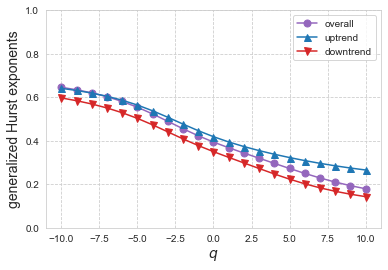

In [39]:
# A-MFDFA and MF-ADCCA

# dataset
dat1 = np.copy(daily_return.values)
dat2 = np.copy(BPV_vola_pctchange.values)

# decide what base of trend to use
trend_base = np.exp(np.cumsum(daily_return.values)) # index-based

fig = plt.figure(figsize=(6,4)) #change figure size
plt.xlabel('$q$', size=14)
plt.ylabel('generalized Hurst exponents', size=14)
#plot
qorders = list(range(-10, 11))
#"""
est_results_xy = basic_dcca(dat1, dat2, Q=qorders, trend_base=trend_base, asymmetry_base='optional')
#"""

#plt.title('MF-ADCCA for price-volatility cross-correlations in '+ asset, size=14)
plt.plot(qorders, est_results_xy[2], marker="o", markersize=7, linestyle='solid', label='overall', color='#9467bd')
plt.plot(qorders, est_results_xy[5], marker="^", markersize=7, linestyle='solid', label='uptrend', color='#1f77b4')
plt.plot(qorders, est_results_xy[8], marker="v", markersize=7, linestyle='solid', label='downtrend', color='#d62728')
#plt.xlim(-6, 6)
plt.ylim(0, 1)
legend = plt.legend(frameon=True)

# save as pdf
#plt.savefig('__.pdf', bbox_inches="tight")
plt.show()

In [40]:
# Calculate h_(xy) (q)
# q=-10
print((est_results_xy[5] - est_results_xy[8])[0])
# q=2
print((est_results_xy[5] - est_results_xy[8])[12])
# q=10
print((est_results_xy[5] - est_results_xy[8])[20])
# D_(xy)
print(0.5*(np.abs(est_results_xy[2][0]-0.5) + np.abs(est_results_xy[2][20]-0.5)))

0.04414644636077725
0.07531508354303107
0.12256091023725288
0.23340813928494814


## multifractal mass function

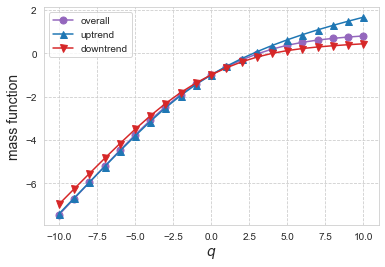

In [42]:
# mass function tau(q) using MFDFA and MFDCCA
# dataset
dat1 = np.copy(daily_return.values)
dat2 = np.copy(BPV_vola_pctchange.values)

# decide what base of trend to use
trend_base = np.exp(np.cumsum(daily_return.values)) #index-based

fig = plt.figure(figsize=(6,4)) #change figure size
plt.xlabel('$q$', size=14)
plt.ylabel('mass function', size=14)
#plot
qorders = list(range(-10, 11))

gh_xy_overall = est_results_xy[2]
gh_xy_uptrend = est_results_xy[5]
gh_xy_downtrend = est_results_xy[8]

plt.plot(qorders, gh_xy_overall*qorders-1, marker="o", markersize=7, linestyle='solid', label='overall', color='#9467bd')
plt.plot(qorders, gh_xy_uptrend*qorders-1, marker="^", markersize=7, linestyle='solid', label='uptrend', color='#1f77b4')
plt.plot(qorders, gh_xy_downtrend*qorders-1, marker="v", markersize=7, linestyle='solid', label='downtrend', color='#d62728')

legend = plt.legend(frameon=True)

# save as pdf
#plt.savefig('__.pdf', bbox_inches="tight")
plt.show()

## multifractal spectrum (singularity spectrum)

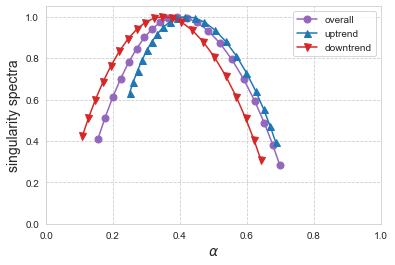

In [44]:
# dataset
dat1 = np.copy(daily_return.values)
dat2 = np.copy(BPV_vola_pctchange.values)

# decide what base of trend to use
trend_base = np.exp(np.cumsum(daily_return.values)) # index-based

fig = plt.figure(figsize=(6,4)) #change figure size
plt.xlabel(r'$\alpha$', size=14)
plt.ylabel('singularity spectra', size=14)
#plot
qorders = np.array([-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]).tolist() # q is set -5 to 5
qorders_D = (np.array(qorders)+0.1).tolist()

#"""
est_results_xy = basic_dcca(dat1, dat2, Q=qorders, trend_base=trend_base, asymmetry_base='optional')
est_results_Dxy = basic_dcca(dat1, dat2, Q=qorders_D, trend_base=trend_base, asymmetry_base='optional')

tau_xy_overall = est_results_xy[2]*qorders-1
tau_xy_uptrend = est_results_xy[5]*qorders-1
tau_xy_downtrend = est_results_xy[8]*qorders-1

tau_Dxy_overall = est_results_Dxy[2]*qorders_D-1
tau_Dxy_uptrend = est_results_Dxy[5]*qorders_D-1
tau_Dxy_downtrend = est_results_Dxy[8]*qorders_D-1

alpha_xy_overall = (tau_Dxy_overall-tau_xy_overall)/0.1
alpha_xy_uptrend = (tau_Dxy_uptrend-tau_xy_uptrend)/0.1
alpha_xy_downtrend = (tau_Dxy_downtrend-tau_xy_downtrend)/0.1
#"""

plt.plot(alpha_xy_overall, qorders*alpha_xy_overall - tau_xy_overall, marker="o", markersize=7, linestyle='solid', label='overall', color='#9467bd')
plt.plot(alpha_xy_uptrend, qorders*alpha_xy_uptrend - tau_xy_uptrend, marker="^", markersize=7, linestyle='solid', label='uptrend', color='#1f77b4')
plt.plot(alpha_xy_downtrend, qorders*alpha_xy_downtrend - tau_xy_downtrend, marker="v", markersize=7, linestyle='solid', label='downtrend', color='#d62728')

legend = plt.legend(frameon=True)
plt.xlim(0, 1)
plt.ylim(0, 1.05) # change plot limits if necessary

# save as pdf
#plt.savefig('__.pdf', bbox_inches="tight")
plt.show()

In [ ]:
# delta alpha (degree of  multifractality)
display(np.max(alpha_xy_uptrend)-np.min(alpha_xy_uptrend))
display(np.max(alpha_xy_downtrend)-np.min(alpha_xy_downtrend))
display(np.maalpha_xy_overallx()-np.min(alpha_xy_overall))

0.4361178407509403

0.5328039732549827

0.5427525287394142

In [46]:
# asymmetric degree of  singularity spectra

#display(alpha_xy_overall, qorders*alpha_xy_overall - tau_xy_overall)

# overall
# alpha_0, alpha_max, min
f_alpha = qorders*alpha_xy_overall - tau_xy_overall
display('alpha_0:', alpha_xy_overall[(f_alpha==1)][0], 'max:', np.max(alpha_xy_overall), 'min:', np.min(alpha_xy_overall))
# A_alpha
delL = alpha_xy_overall[(f_alpha==1)][0] - np.min(alpha_xy_overall)
delR = np.max(alpha_xy_overall) - alpha_xy_overall[(f_alpha==1)][0]
display('A_alpha:', (delL-delR)/(delL+delR))
display('--------uptrend-----------')

# uptrend
# alpha_0, alpha_max, min
f_alpha = qorders*alpha_xy_uptrend - tau_xy_uptrend
display('alpha_0:', alpha_xy_uptrend[(f_alpha==1)][0], 'max:', np.max(alpha_xy_uptrend), 'min:', np.min(alpha_xy_uptrend))
# A_alpha
delL = alpha_xy_uptrend[(f_alpha==1)][0] - np.min(alpha_xy_uptrend)
delR = np.max(alpha_xy_uptrend) - alpha_xy_uptrend[(f_alpha==1)][0]
display('A_alpha:', (delL-delR)/(delL+delR))
display('-------downtrend------------')

# downtrend
# alpha_0, alpha_max, min
f_alpha = qorders*alpha_xy_downtrend - tau_xy_downtrend
display('alpha_0:', alpha_xy_downtrend[(f_alpha==1)][0], 'max:', np.max(alpha_xy_downtrend), 'min:', np.min(alpha_xy_downtrend))
# A_alpha
delL = alpha_xy_downtrend[(f_alpha==1)][0] - np.min(alpha_xy_downtrend)
delR = np.max(alpha_xy_downtrend) - alpha_xy_downtrend[(f_alpha==1)][0]
display('A_alpha:', (delL-delR)/(delL+delR))

'alpha_0:'

0.3915615102685843

'max:'

0.6973675050095851

'min:'

0.15461497627017096

'A_alpha:'

-0.12687082435621072

'--------uptrend-----------'

'alpha_0:'

0.4164229035766598

'max:'

0.6852984402279638

'min:'

0.24918059947702353

'A_alpha:'

-0.23304075883863887

'-------downtrend------------'

'alpha_0:'

0.347526027408146

'max:'

0.6413586235731161

'min:'

0.10855465031813338

'A_alpha:'

-0.10296698566229114